In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
from heapq import heapify, heappop, heappush
from xml.dom.minidom import Element
from PIL import Image
import numpy as np
from pip import main
from matplotlib import pyplot as plt
from matplotlib import image
from pyparsing import Each
from matplotlib.pyplot import figure


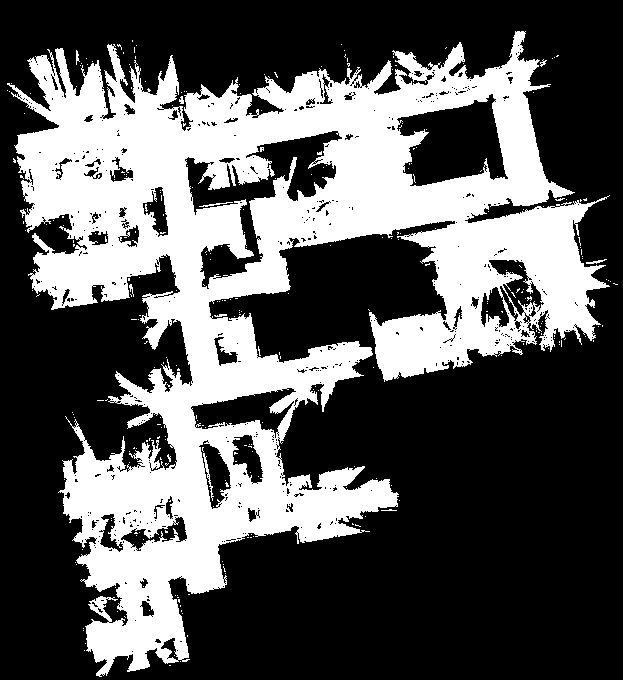

In [61]:
occ_grid_map = Image.open('/content/drive/MyDrive/MR-2/occupancy_map.png')
occ_img = (np.asarray(occ_grid_map)>0).astype(int)
occ_grid_map

In [62]:
import math
def calc_distance(src, goal):
    x1, y1 = src
    x2, y2 = goal
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [63]:
def get_adjacent_cells(graph, pos):
    neighbors = [(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]
    adjacent_pos = []
    for x, y in neighbors:
        adjacent_x = pos[0] + x
        adjacent_y = pos[1] + y
        if graph[(adjacent_x, adjacent_y)] == 1:
            adjacent_pos.append((adjacent_x, adjacent_y))
    return adjacent_pos


In [64]:
def recover_path(prev_pos, curr_pos, predecessors):
    optimal_path = [curr_pos]
    temp_var = curr_pos
    while temp_var != prev_pos:
        temp_var = predecessors[temp_var]
        optimal_path.append(temp_var)
    return optimal_path


In [65]:
def convert_to_vertices(graph):
    vertices = {}
    for row in range(len(graph)):
        for col in range(len(graph[0])):
            vertices[(row, col)] = graph[row][col]
    return vertices

In [66]:
def run_astar(graph, start, goal):
    cost_to_reach = {}
    total_est_cost = {}
    predecessors = {}
    vertices = convert_to_vertices(graph)
    for vertex in vertices:
        cost_to_reach[vertex] = float('inf')
        total_est_cost[vertex] = float('inf')
    cost_to_reach[start] = 0
    total_est_cost[start] = calc_distance(start, goal)
    priority_queue = [(calc_distance(start, goal), start)]
    while priority_queue:
        new_cost, curr_vertex = heappop(priority_queue)
        if curr_vertex == goal:
            return recover_path(start, goal, predecessors)
        neighbors = get_adjacent_cells(vertices, curr_vertex)
        for each in neighbors:
            path_cost = cost_to_reach[curr_vertex] + calc_distance(curr_vertex, each)
            if path_cost < cost_to_reach[each]:
                predecessors[each] = curr_vertex
                cost_to_reach[each] = path_cost
                prev_est = total_est_cost[each]
                total_est_cost[each] = path_cost + calc_distance(each, goal)
                if (prev_est, each) in priority_queue:
                    priority_queue.remove((prev_est, each))
                    heappush(priority_queue, (total_est_cost[each],each))
                else:
                    heappush(priority_queue, (total_est_cost[each],each))



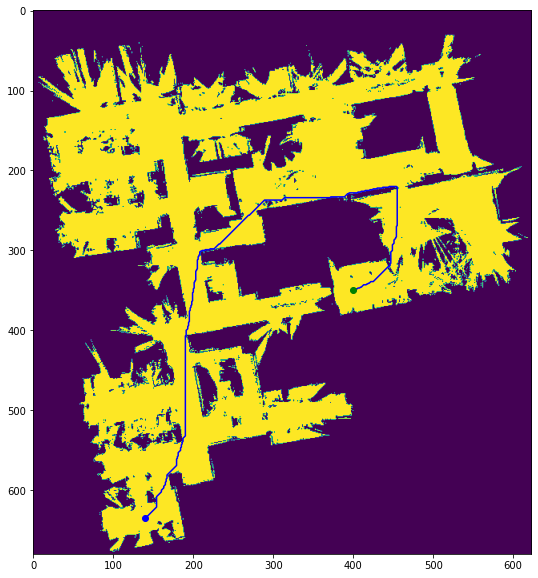

In [67]:
if __name__ == "__main__":
    start_pos = (635, 140)
    goal_pos = (350, 400)
    path = run_astar(occ_img,start_pos,goal_pos)
    start_x, start_y = path[-1]
    goal_x, goal_y = path[0]
    path_arr = np.array(path)
    data = image.imread('/content/drive/MyDrive/MR-2/occupancy_map.png')


    fig, ax = plt.subplots(figsize=(10,10))
    data = ax.imshow(data)
    plt.plot(path_arr[:, 1], path_arr[:, 0], 'b')
    plt.plot(goal_y, goal_x, 'go')
    plt.plot(start_y, start_x, 'bo')
    plt.show()

In [68]:
def random(M):
  while True:
    vertex = (np.random.choice(M.shape[0]),np.random.choice(M.shape[1]))
    if M[vertex] == 1:
      return vertex

In [69]:
def Reach(M,v1,v2):
  x_val = v2[0] - v1[0]
  y_val = v2[1] - v1[1]
  if x_val <0:
      k= range(x_val-1,0)
  else:
      k = range(0,x_val+1)
  if y_val<0:
      l = range(y_val-1,0)
  else:
      l= range(0,y_val+1)
  for i in k:
      for j in l:
          a = v1[0]+i
          b = v1[1]+j
          if M[a,b] == 0:
              return False 
  return True

In [70]:
def dist(vert1,vert2):
    return math.sqrt((vert1[1]-vert2[1])**2 + (vert1[0]-vert2[0])**2)

In [71]:
import networkx as nx
import random
def add_vertex(G,v_new,dmax):
    G.add_node(v_new,pos = (v_new[1],v_new[0]))
    for v in G:
        if v != v_new and dist(v,v_new) <= dmax:
            if Reach(M,v,v_new) == True:
                G.add_edge(v,v_new,weight =dist(v,v_new))
def Construct_PRM(M,N,dmax):
    G = nx.Graph()
    for i in range(N):
        v_new = Random(M)
        add_vertex(G,v_new,dmax)
    return G

In [72]:
occupancy_map_img = Image.open('/content/drive/MyDrive/MR-2/occupancy_map.png')


In [73]:
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)

In [74]:
M= occupancy_grid
prn = Construct_PRM(M,2500,75)

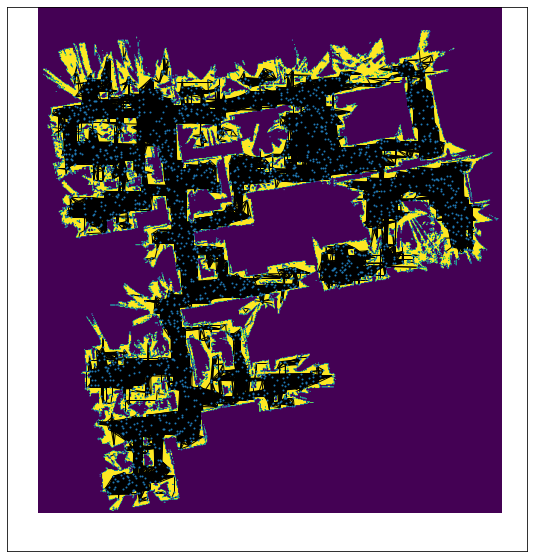

In [75]:
import matplotlib.pyplot as plt
import scipy.misc
from scipy import ndimage
G = prn
fig,ax = plt.subplots(figsize=(10,10))
#plt.figure(1)
rotated_img = ndimage.rotate(occupancy_map_img, 0)
plt.imshow(rotated_img)
nx.draw_networkx(prn,pos =nx.get_node_attributes(prn,'pos'),with_labels=False,node_size = 1)
plt.show()

In [76]:
start_point=(635,140)
goal_point=(350,400)
add_vertex(prn,start_point,75)
add_vertex(prn,goal_point,75)
optimal_path1 = nx.astar_path(prn, start_point, goal_point, weight="cost")

In [85]:
Total_length = nx.astar_path_length(prn, start_point, goal_point)
print("Total length is = " + str(Total_length))

Total length is = 825.4035490439635


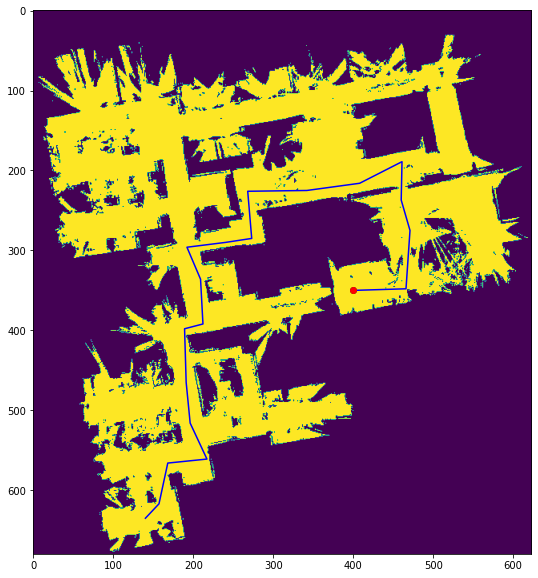

In [78]:
data = occupancy_map_img
import matplotlib.pyplot as plt
x_ac= []
y_ac = []
fig,ax = plt.subplots(figsize=(10,10))
data = ax.imshow(data)
for i in optimal_path1:
    x_ac.append(i[0])
    y_ac.append(i[1])
plt.plot(y_ac, x_ac, 'b')
plt.plot(goal_point[1], goal_point[0], 'go')
plt.plot(goal_point[1], goal_point[0], 'ro')
plt.show()